### **Package Import/ Load Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv('data/spanish_wines.csv')

df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


### **Data Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [4]:
df['year'].replace('')

0       2013
1       2018
2       2009
3       1999
4       1996
        ... 
7495    2016
7496    2018
7497    2017
7498    2011
7499    2016
Name: year, Length: 7500, dtype: object

In [5]:
df.duplicated().sum()

5452

In [6]:
df = df.drop_duplicates()
df.shape

(2048, 11)

In [7]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [8]:
df['type'].fillna('Missing', inplace=True)

median_body = df['body'].median()
median_acidity = df['acidity'].median()

df['body'].fillna(median_body, inplace=True)
df['acidity'].fillna(median_acidity, inplace=True)

In [9]:
df.isna().sum()

winery         0
wine           0
year           2
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [10]:
df['year'] = df['year'].replace({'N.V.': np.nan})

In [11]:
df = df.dropna(subset=['year'])

df['year'] = df['year'].astype(int)


### **Exploratory Analysis**

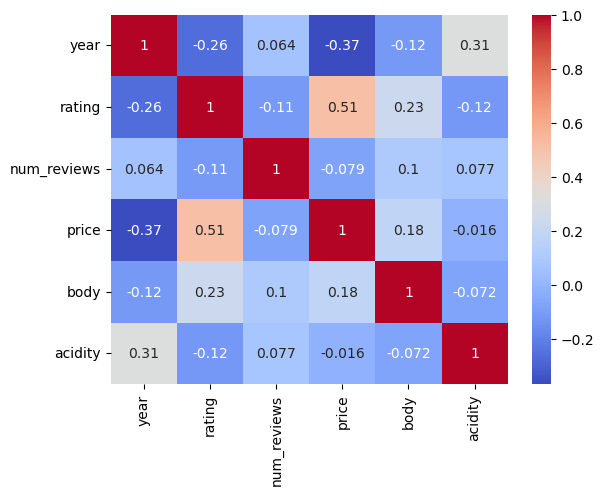

In [12]:
wine_corr = df.corr()
sns.heatmap(wine_corr, annot=True, cmap='coolwarm');

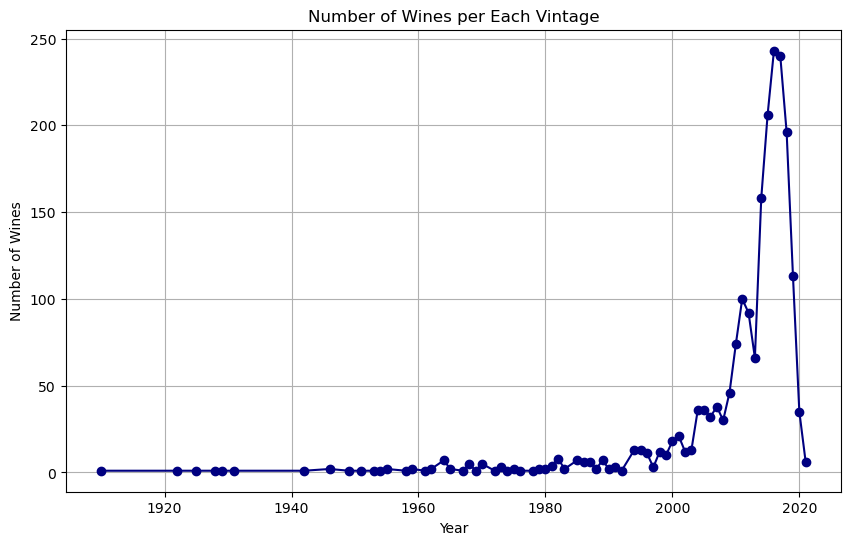

In [17]:
wine_counts = df.groupby('year')['wine'].count()

plt.figure(figsize=(10, 6))
plt.plot(wine_counts.index, wine_counts.values, marker='o', color='navy')
plt.xticks([1920, 1940, 1960, 1980, 2000, 2020])
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.title('Number of Wines per Each Vintage')
plt.grid(True)
plt.show()

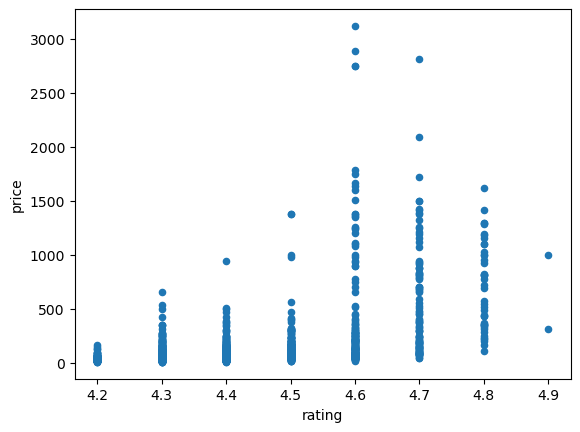

In [18]:
ax = df.plot(kind='scatter', x='rating', y='price' )